
The objective of this project is find or uncover purchase patterns in customer behaviour. Finding Hidden patterns in behaviour can help optimize consumer choices when shopping online or in-store. 

**Brief**

Data Exploration

## Stages of the capstone 

1. Sourcing and loading 
    * Load Online Retail Dataset
    * Add `TotalAmount` column to DataFrame to reflect total purchases made for each customer
    * Deal with Missing Values
    * Assess data types for each column
 
 
2. Data Wrangling
    * Remove free items, billing and price adjustments
    * How many unique items are sold at the store
    * Check for duplicates 
    * Look at cancel items in data
3. Exploratory Data Analysis
    * Top Customers By Country
    * Most Orders By Country
    * Most Non-UK Customers By Orders
    * Total Sales By Hour
    * Average Monthly Sales
    * Most Expensive Items
    * How Do Holiday 2010 and 2011 Sales Compare?
    * Another Look At CAnceled Items and Returns


# Import Libraries

In [10]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind

# Load and Unpack Dataset

In [12]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
retail['TotalAmount'] = retail['Quantity'] * retail['UnitPrice']

## Number of Rows and Columns in Data

## Add `TotalAmount` column to Data to reflect total purchases made for each customer.

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalAmount  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [15]:
retail.shape
print('The Dataset has ' + str(retail.shape[0]) + ' rows and ' + str(retail.shape[1]) + ' columns')

The Dataset has 541909 rows and 9 columns


Data Definitions: Column names, Data Types, Description of Columns, Counts and Percents of Unique Values, Ranges of Values

In [16]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

## Missing Values in data

In [17]:
retail.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
TotalAmount    False
dtype: bool

In [18]:
missing_values = pd.concat([retail.isnull().sum(), 100 * retail.isnull().mean()], axis=1)
missing_values.rename(columns={0: 'Count', 1: 'Percent'}, inplace=True)
missing_values

,Count,Percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000
TotalAmount,0,0.000000


There are 1454 items without a description in the "Description" column in the dataset. This accounts for .27% of the total dataset. There are 135080 rows without a "CustomerID", which is about 25% of the dataset. 

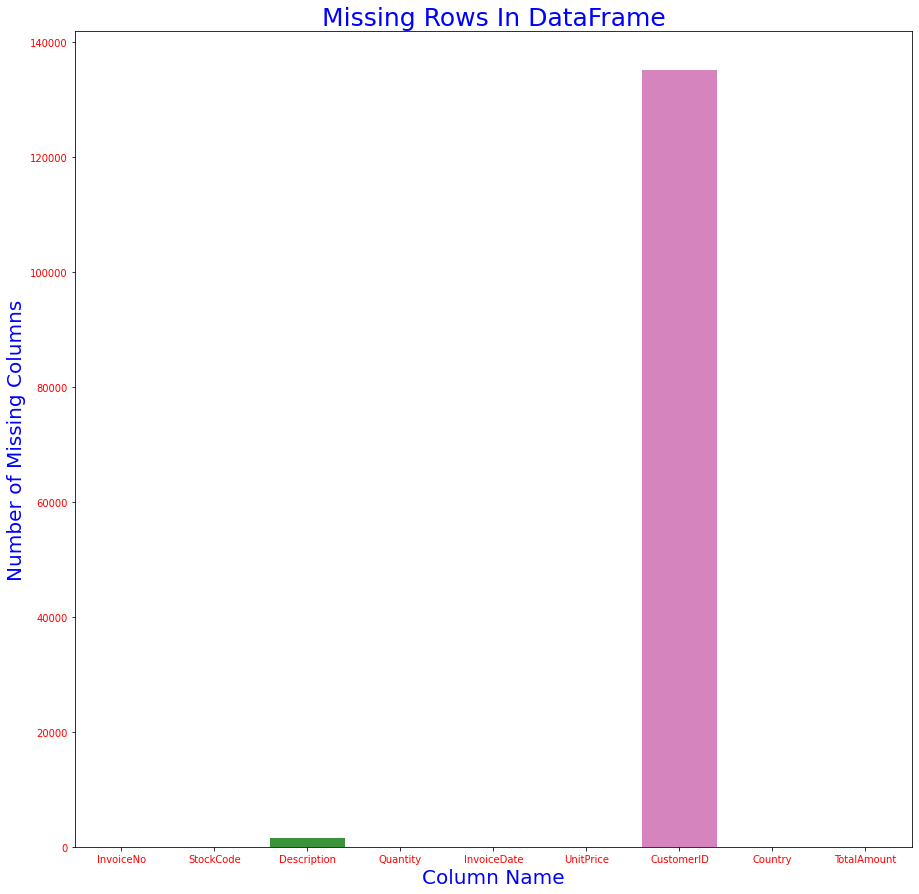

In [19]:
plt.figure(figsize=(15,15))
sns.barplot(x=missing_values.index, y='Count', data=missing_values)
plt.xticks(color='red')
plt.yticks(color='red')
plt.title('Missing Rows In DataFrame', color='blue', fontsize=25)
plt.xlabel('Column Name', color='blue', fontsize=20)
plt.ylabel('Number of Missing Columns', color='blue', fontsize=20)
plt.show()

## Data types for each column

In [20]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
dtype: object

# Data Wrangling

## Remove Free Items, Billing and Price Adjustments

In [21]:
free = retail['UnitPrice'] == 0.0
df = retail[~free]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df.groupby('UnitPrice')['Description'].value_counts()

UnitPrice   Description               
-11062.060  Adjust bad debt               2
 0.001      PADS TO MATCH ALL CUSHIONS    3
            Bank Charges                  1
 0.010      Discount                      1
 0.030      Discount                      1
                                         ..
 13541.330  AMAZON FEE                    3
 16453.710  AMAZON FEE                    1
 16888.020  AMAZON FEE                    1
 17836.460  AMAZON FEE                    1
 38970.000  Manual                        1
Name: Description, Length: 16144, dtype: int64

## How Many Unique Items Are Sold At The Store?

In [23]:
df.StockCode.nunique()

3938

## Duplicates



In [24]:
duplicates = df.duplicated(['CustomerID'], keep=False)
df_dupl = df[duplicates]
df_dupl

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [25]:
df = df.drop_duplicates(keep=False)

df[duplicates].sort_values('CustomerID')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
428957,573511,23480,MINI LIGHTS WOODLAND MUSHROOMS,12,2011-10-31 12:25:00,3.75,12347.0,Iceland,45.00
72252,542237,20966,SANDWICH BATH SPONGE,10,2011-01-26 14:30:00,1.25,12347.0,Iceland,12.50
72253,542237,22725,ALARM CLOCK BAKELIKE CHOCOLATE,4,2011-01-26 14:30:00,3.75,12347.0,Iceland,15.00
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


In [26]:
df[df['StockCode'] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,-5.76
...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,-19.82
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,-16.76
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,-26.33
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,-20.53


In [27]:
df[df['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,18.95
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom,2.55
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,5.04
...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,5.00
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,-125.00
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,-9.95
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,1.26


In [28]:
one_letter = df['StockCode'].str.len() == 1
df[one_letter]['Description'].value_counts()

Manual             560
Discount            77
SAMPLES             61
Adjust bad debt      3
Name: Description, dtype: int64

In [29]:
df = df[~one_letter]

## Cancelled Items 

In [30]:
negative = df['Quantity'] <= 0
df = df[~negative]

In [31]:
#Checking to ensure all item cancelation have been removed
df.sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
335614,566290,23199,JUMBO BAG APPLES,1,2011-09-11 15:24:00,2.08,14456.0,United Kingdom,2.08
466773,576329,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,1,2011-11-14 15:22:00,3.29,NaN,United Kingdom,3.29
466772,576329,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,1,2011-11-14 15:22:00,3.29,NaN,United Kingdom,3.29
466771,576329,22633,HAND WARMER UNION JACK,1,2011-11-14 15:22:00,4.13,NaN,United Kingdom,4.13
466770,576329,22631,CIRCUS PARADE LUNCH BOX,1,2011-11-14 15:22:00,4.13,NaN,United Kingdom,4.13
...,...,...,...,...,...,...,...,...,...
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.00
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.00
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60


In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [33]:
more_than_one = df['Quantity'] > 1
df = df[more_than_one] 

In [34]:
null = df.CustomerID.isna()
df['CustomerID'] = df['CustomerID'].fillna(0)

## Change `CustomerID` column to `int` data type

In [35]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [37]:
df['Year'] = df['InvoiceDate'].dt.year

In [38]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [39]:
df['Month'] = df['InvoiceDate'].dt.month

# Exploratory Data Analysis

## Top Five Customers By Country

---



In [40]:
customers_country = df.groupby('Country').CustomerID.nunique().reset_index()
customers_country.columns = ['Country', 'Customers']
customers_country = customers_country.sort_values(by='Customers', ascending=False).head()

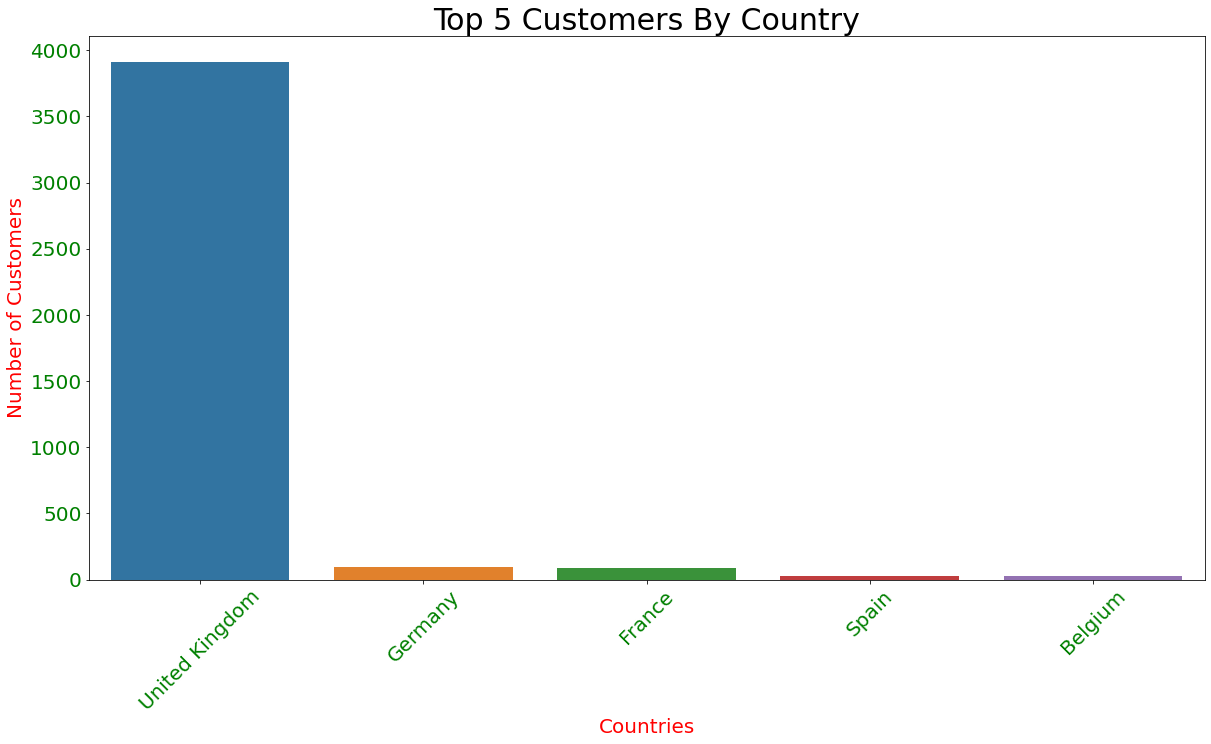

In [41]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Country', y='Customers', data=customers_country)
plt.xticks(rotation=45, color='g', fontsize=20)
plt.yticks(color='g', fontsize=20)
plt.title('Top 5 Customers By Country', fontsize=30)
plt.xlabel('Countries', fontsize=20, color='r')
plt.ylabel('Number of Customers', fontsize=20, color='r')
plt.savefig('Most_Customers_By_Country.png')
plt.show()

## Top Five Orders By Country

In [42]:
orders_country = df.groupby('Country').InvoiceNo.nunique().reset_index()
orders_country.columns = ['Country', 'Count']
orders_country = orders_country.sort_values(by='Count', ascending=False)
orders_country = orders_country.head()


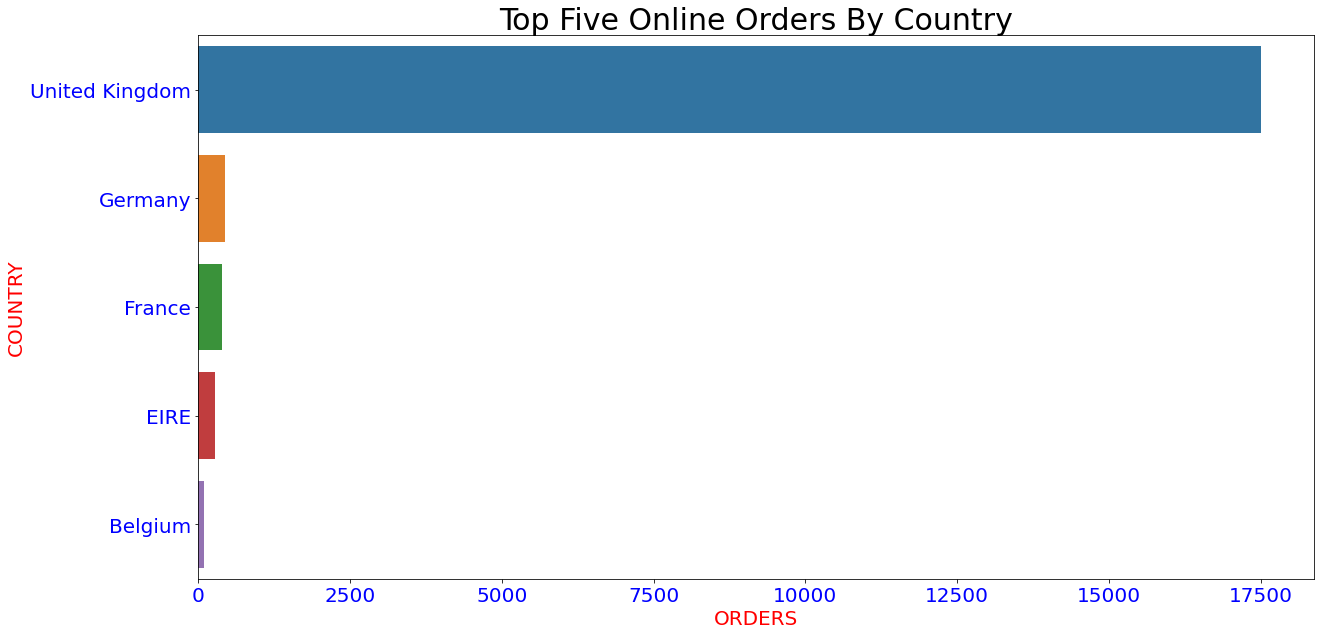

In [43]:
fig = plt.figure(figsize=(20,10))
sns.barplot(y='Country', x='Count', data=orders_country)
plt.xticks(fontsize=20, color='blue')
plt.yticks(fontsize=20, color='blue')
plt.title('Top Five Online Orders By Country', fontsize=30)
plt.xlabel('ORDERS', fontsize=20, color='red')
plt.ylabel('COUNTRY', fontsize=20, color='red')
plt.savefig('Most_Orders_By_Country.png')
plt.show()

In [44]:
orders = df.groupby('Description').InvoiceNo.nunique().reset_index()
orders.columns = ['product', 'item_count']
orders
orders = orders.sort_values(by='item_count', ascending=False)
top5 = orders.head(5)

## Most Item Ordered

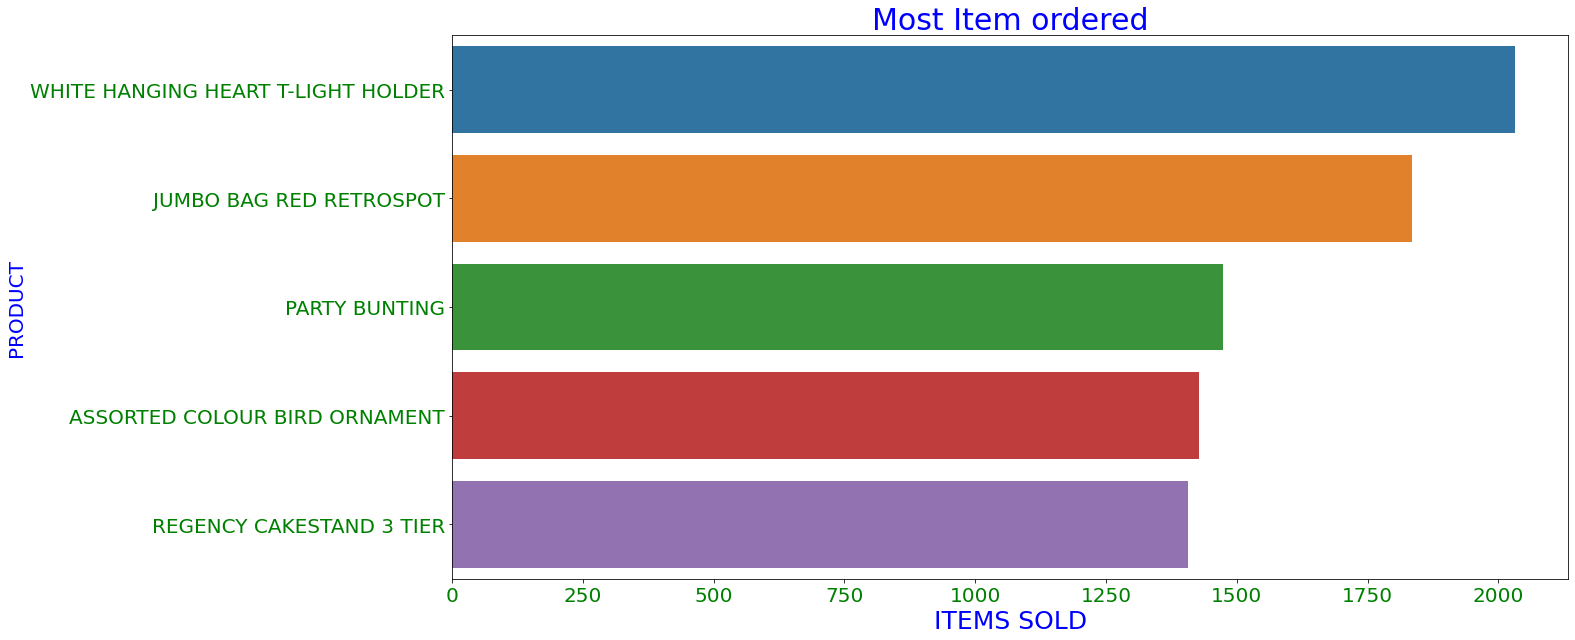

In [45]:
fig = plt.figure(figsize=(20,10))
sns.barplot(y='product', x='item_count', data=top5)
plt.xticks(fontsize=20, color='g')
plt.yticks(fontsize=20, color='g')
plt.title('Most Item ordered', fontsize=30, color='b')
plt.xlabel('ITEMS SOLD', fontsize=25, color='b')
plt.ylabel('PRODUCT', fontsize=20, color='b')
plt.savefig('Most_Item_Ordered.png')
plt.show()

## Most Non-UK Customers By Orders Placed

In [46]:
non_uk = df[df['Country'] != 'United Kingdom']
non_uk = non_uk.groupby('Country').InvoiceNo.nunique().reset_index()
non_uk.columns = ['Country', 'Orders']
non_uk = non_uk.sort_values(by='Orders', ascending=False)
non_uk_top_5 = non_uk.head()
non_uk_top_5

,Country,Orders
14,Germany,445
13,France,384
10,EIRE,281
3,Belgium,98
31,Spain,90


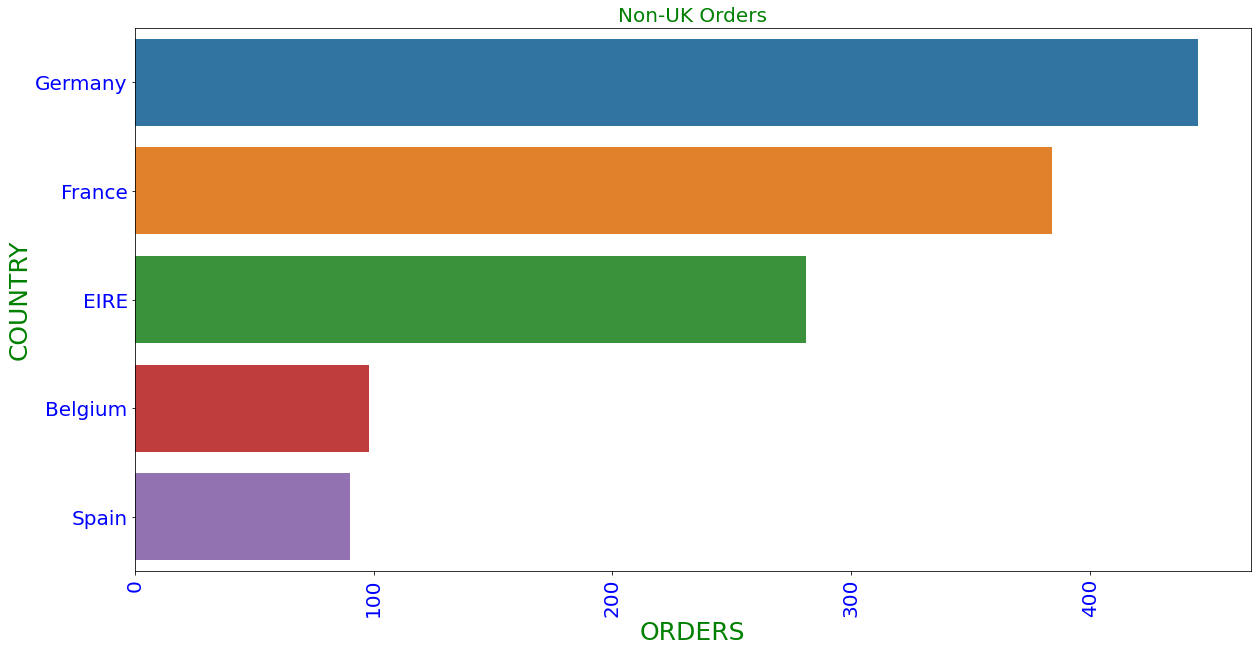

In [47]:
fig = plt.figure(figsize=(20,10))
sns.barplot(y='Country', x='Orders', data=non_uk_top_5)
plt.xticks(rotation=90)
plt.title('Non-UK Orders', fontsize=20, color='g')
plt.xlabel('ORDERS', fontsize=25, color='g')
plt.ylabel('COUNTRY', fontsize=25, color='g')
plt.xticks(color='b', fontsize=20)
plt.yticks(color='b', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.savefig('Most_Non_UK_Orders.png')
plt.show()

## Total Sales By Hour

In [48]:
sales_hr = df.groupby('Hour').TotalAmount.sum().reset_index()
sales_hr.columns = ['Hour', 'TotalSales']
sales_hr

,Hour,TotalSales
0,7,30867.16
1,8,280571.07
2,9,923439.41
3,10,1363299.01
4,11,1145019.20
5,12,1346056.66
6,13,1159115.92
7,14,1048473.49
8,15,1152047.50
9,16,604873.96


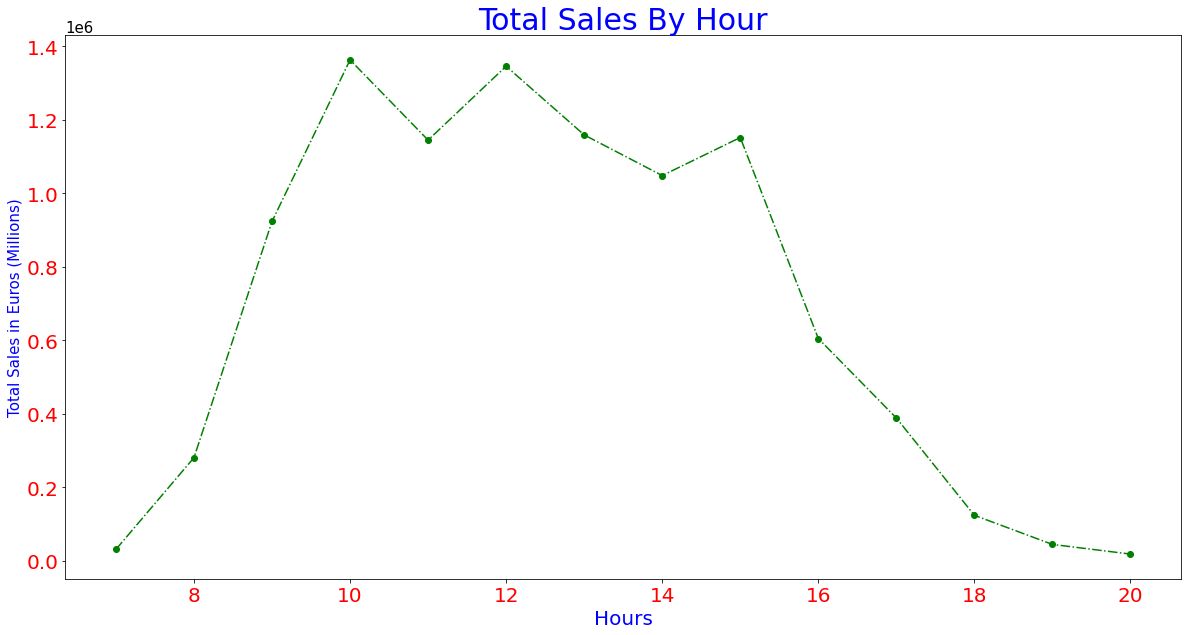

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(sales_hr['Hour'], sales_hr['TotalSales'], marker='o', linestyle='-.', color='g')
plt.title('Total Sales By Hour', fontsize=30, color='b')
plt.xlabel('Hours', fontsize=20, color='b')
plt.ylabel('Total Sales in Euros (Millions)', fontsize=15, color='b')
plt.xticks(fontsize=20, color='r')
plt.yticks(fontsize=20, color='r')
plt.savefig('Busiest_Hours_Of_The_Day.png')
plt.show()

## What's The Average Monthly Sales?

In [50]:
month_sales = df.groupby('Month').TotalAmount.mean().reset_index()
month_sales.columns = ['Month', 'avg_sales']
month_sales

,Month,avg_sales
0,1,26.347188
1,2,24.653114
2,3,25.003285
3,4,22.862932
4,5,25.745560
5,6,26.795779
6,7,23.691805
7,8,26.345413
8,9,26.012003
9,10,23.917013


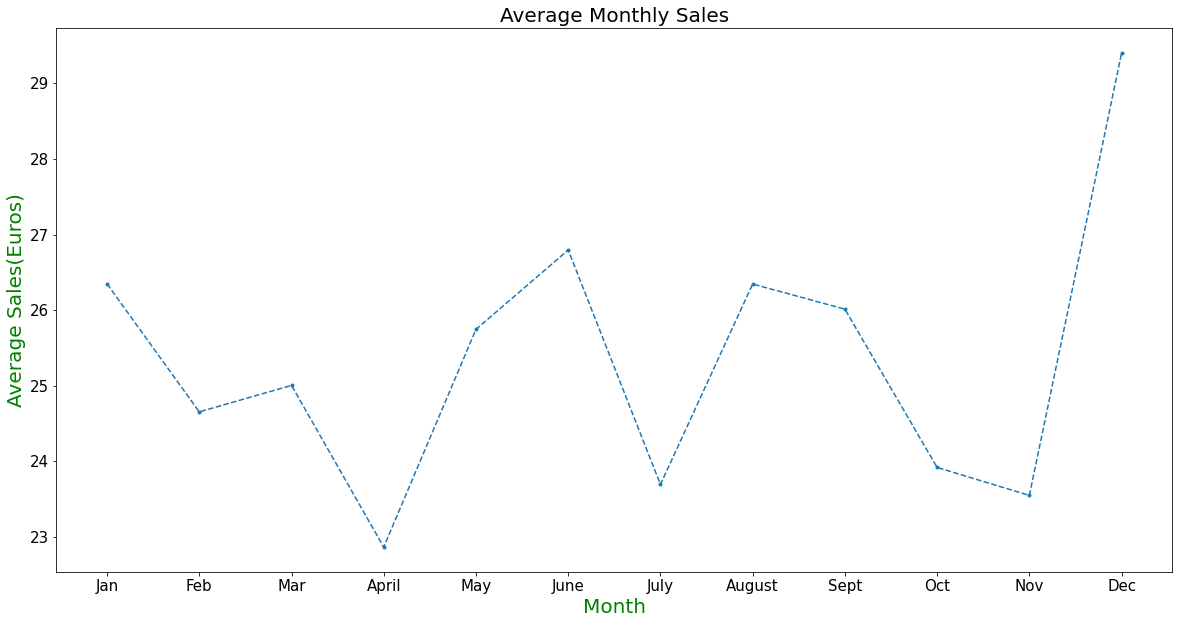

In [51]:
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec']
x = month_sales['Month']
y = month_sales['avg_sales']
plt.figure(figsize=(20, 10))
plt.plot(x, y, marker='.', linestyle='--')
plt.title('Average Monthly Sales', fontsize=20)
plt.xlabel('Month', fontsize=20, color='g')
plt.xticks(x, months)
plt.ylabel('Average Sales(Euros)', fontsize=20, color='g')
plt.savefig('Average_Monthly_sales.png')
plt.show()

## Most Expensive Items

In [52]:
december = df['Month'] > 11
holiday = df[december]
mean_holiday_sales = holiday.groupby('Year').TotalAmount.mean().reset_index()
holiday.sort_values(by='Quantity', ascending=False)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Hour,Month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,2011,9,12
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom,518.40,2010,17,12
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029,United Kingdom,2256.00,2010,10,12
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299,United Kingdom,1003.20,2010,16,12
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875,United Kingdom,293.76,2010,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
517399,580054,84580,MOUSE TOY WITH PINK T-SHIRT,2,2011-12-01 13:08:00,3.75,18122,United Kingdom,7.50,2011,13,12
22518,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom,5.90,2010,20,12
22521,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom,7.50,2010,20,12
517394,580054,82616C,MIDNIGHT GLAMOUR SCARF KNITTING KIT,2,2011-12-01 13:08:00,1.25,18122,United Kingdom,2.50,2011,13,12


In [53]:
holiday_2010_prices = holiday.loc[holiday['Year'] == 2010, 'UnitPrice']
holiday_2011_prices = holiday.loc[holiday['Year'] == 2011, 'UnitPrice']

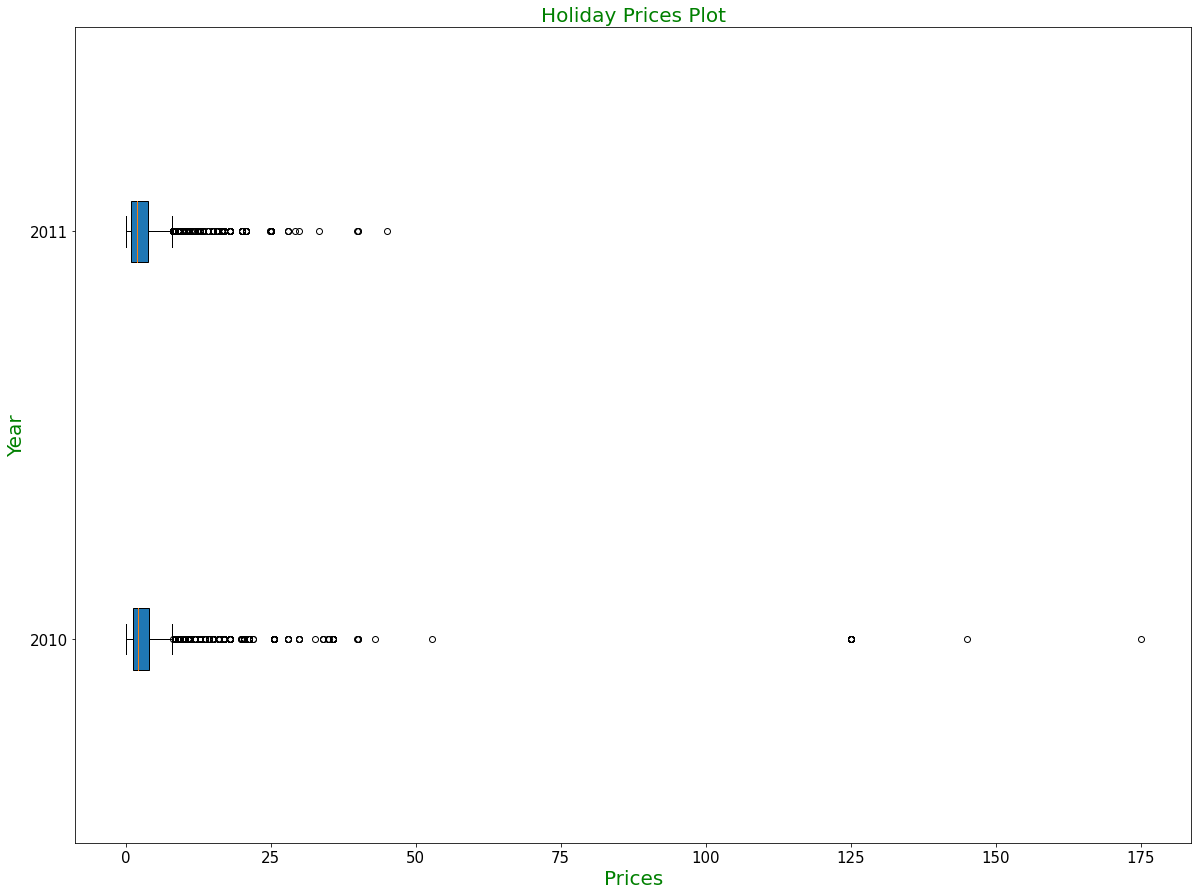

In [54]:
holiday_price = [holiday_2010_prices, holiday_2011_prices]
plt.figure(figsize=(20, 15))
plt.boxplot(holiday_price, patch_artist='True', labels=['2010', '2011'], vert=0)
plt.title('Holiday Prices Plot', fontsize=20, color='g')
plt.ylabel('Year', fontsize=20, color='g')
plt.xlabel('Prices', fontsize=20, color='g')
plt.savefig('Holiday_Prices.png')
plt.show()

In [55]:
prices = df.groupby(['UnitPrice', 'Description']).StockCode.count().reset_index()
prices = prices.sort_values(by='UnitPrice', ascending=False)
prices.columns = ['UnitPrice', 'Description', 'Product Count']
toptenprice = prices.head(10)
toptenprice = toptenprice.sort_values(by='UnitPrice', ascending=False)

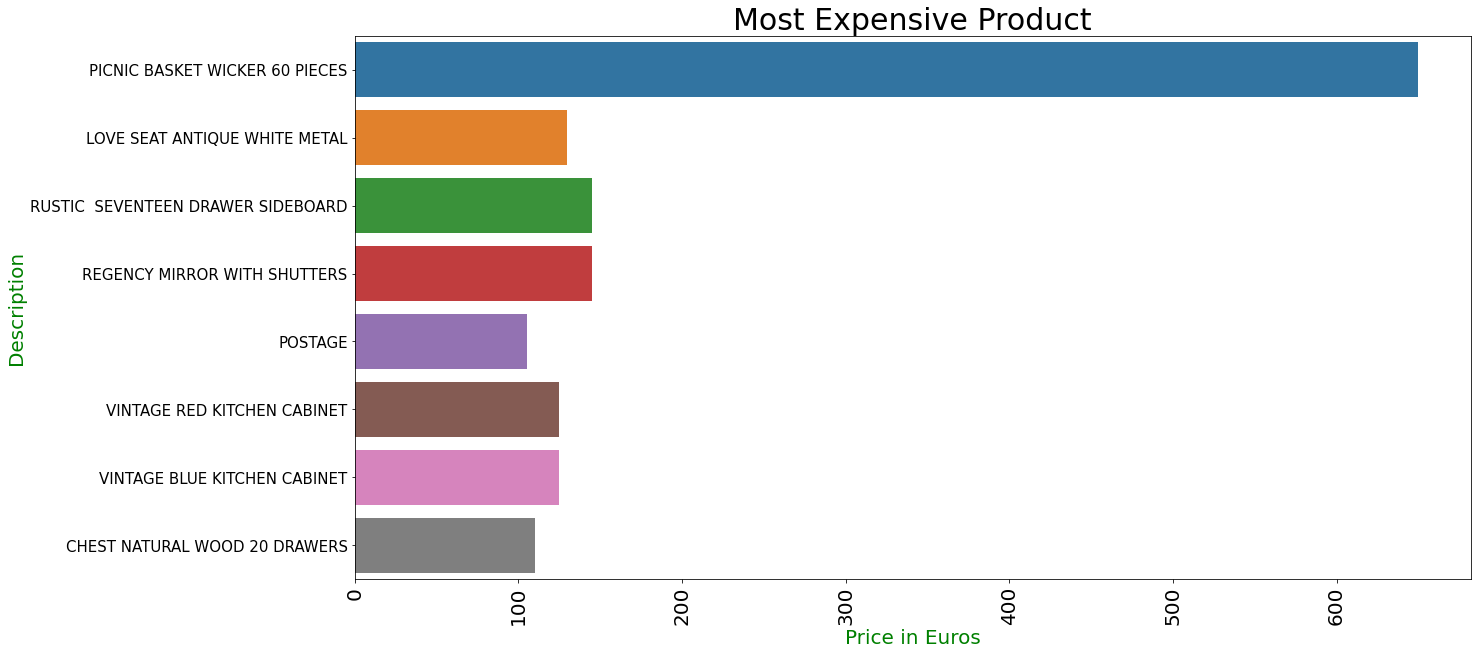

In [56]:
plt.figure(figsize=(20, 10))
sns.barplot(y='Description', x='UnitPrice', data=toptenprice, ci=None)
plt.title('Most Expensive Product', fontsize=30)
plt.xticks(rotation=90, fontsize=20)
plt.xlabel('Price in Euros', fontsize=20, color='green')
plt.ylabel('Description', fontsize=20, color='green')
plt.savefig('Most_Expensive_Product.png')
plt.show()

## How Do Holiday 2010 and 2011 Sales Compare?

In [57]:
holiday_2010 = holiday.loc[holiday['Year'] == 2010, 'TotalAmount']
holiday_2011 = holiday.loc[holiday['Year'] == 2011, 'TotalAmount']

In [58]:
mean_2010_sales = np.mean(holiday_2010)
mean_2011_sales = np.mean(holiday_2011)
len(holiday['TotalAmount'])
print(mean_2010_sales)
/
print(mean_2011_sales)

26.649484369114795
33.615281726618896


T-test was used to compare average sales in December 2010 and 2011. Altough December 2011 had higher average sales than December 2010, the average sales were not significant. In other words, the t-test tell us that average sales from both holiday years were the same.

In [59]:
x = ttest_ind(holiday_2010, holiday_2011)
x

Ttest_indResult(statistic=-0.8836092834193682, pvalue=0.37691200220456245)

## Another Look At Canceled Items and Returns

In [60]:
canceled = retail['Quantity'] < 0
canceled_items = retail[canceled]

In [61]:
canceled_orders = canceled_items.groupby(['Description']).InvoiceNo.nunique().reset_index()
canceled_orders = canceled_orders.sort_values(by='InvoiceNo', ascending=False)
canceled_orders.columns = ['product', 'canceled_orders']
top_5_cancel = canceled_orders.head(5)
top_5_cancel

,product,canceled_orders
1126,Manual,223
1437,REGENCY CAKESTAND 3 TIER,180
1342,POSTAGE,124
2024,check,120
918,JAM MAKING SET WITH JARS,87


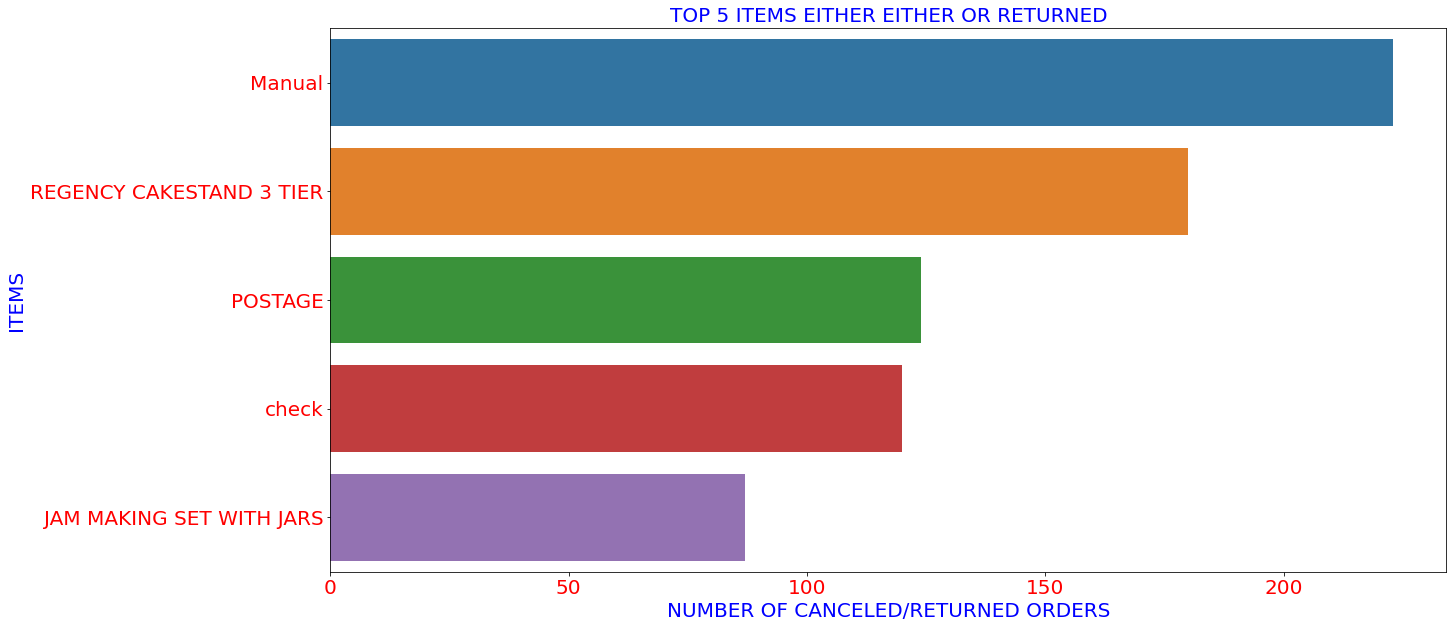

In [62]:
plt.figure(figsize=(20, 10))
sns.barplot(y='product', x='canceled_orders', data=top_5_cancel)
plt.title('TOP 5 ITEMS EITHER EITHER OR RETURNED', color='blue', fontsize=20)
plt.xlabel('NUMBER OF CANCELED/RETURNED ORDERS', fontsize=20, color='b')
plt.ylabel('ITEMS', fontsize=20, color='b')
plt.xticks(fontsize=20, color='red')
plt.yticks(fontsize=20, color='red')
plt.savefig('Cancelation_Reasons.png', bbox_inches="tight")
plt.show()

In [64]:
df.to_csv('DW_EDA_Capstone_Project.csv', index=False)